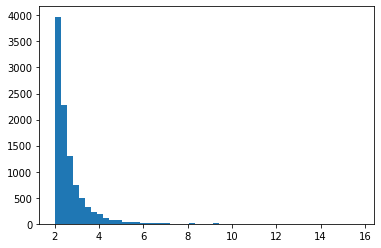

In [13]:
# tests for exercise 3

import numpy as np
from numpy.random import rand
import matplotlib.pyplot as plt

def f(x, alpha):
    res = 2 * np.power(1-x, 1 / (1-alpha))
    return res

f = np.vectorize(f)

x = rand(10000,1)

#hist, bin_edges = np.histogram(f(x,2), bins=10, range=(2,12))
#plt.hist(hist, bins=bin_edges)

alpha_true = 5
bin_count = 50
n, bins, patches = plt.hist(f(x, alpha_true), bins=bin_count, density=False)
#plt.yscale('log')
#plt.xscale('log')

plt.show()

In [14]:
n

array([3.974e+03, 2.277e+03, 1.299e+03, 7.530e+02, 5.030e+02, 3.230e+02,
       2.180e+02, 1.790e+02, 1.120e+02, 8.200e+01, 6.800e+01, 4.200e+01,
       2.800e+01, 3.500e+01, 2.200e+01, 1.200e+01, 1.100e+01, 1.200e+01,
       7.000e+00, 5.000e+00, 2.000e+00, 3.000e+00, 6.000e+00, 3.000e+00,
       2.000e+00, 2.000e+00, 6.000e+00, 3.000e+00, 0.000e+00, 2.000e+00,
       0.000e+00, 1.000e+00, 1.000e+00, 0.000e+00, 1.000e+00, 2.000e+00,
       0.000e+00, 0.000e+00, 0.000e+00, 1.000e+00, 0.000e+00, 1.000e+00,
       0.000e+00, 1.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00,
       0.000e+00, 1.000e+00])

In [15]:
bins

array([ 2.00001994,  2.27461381,  2.54920768,  2.82380156,  3.09839543,
        3.37298931,  3.64758318,  3.92217706,  4.19677093,  4.47136481,
        4.74595868,  5.02055256,  5.29514643,  5.56974031,  5.84433418,
        6.11892806,  6.39352193,  6.66811581,  6.94270968,  7.21730356,
        7.49189743,  7.7664913 ,  8.04108518,  8.31567905,  8.59027293,
        8.8648668 ,  9.13946068,  9.41405455,  9.68864843,  9.9632423 ,
       10.23783618, 10.51243005, 10.78702393, 11.0616178 , 11.33621168,
       11.61080555, 11.88539943, 12.1599933 , 12.43458718, 12.70918105,
       12.98377492, 13.2583688 , 13.53296267, 13.80755655, 14.08215042,
       14.3567443 , 14.63133817, 14.90593205, 15.18052592, 15.4551198 ,
       15.72971367])

In [17]:
len(bins)

51

In [26]:
midpoints = np.zeros(bin_count)

for i in range(0, bin_count):
    midpoints[i] = (bins[i] + bins[i+1]) / 2

In [27]:
print(midpoints)

[ 2.13731687  2.41191075  2.68650462  2.9610985   3.23569237  3.51028625
  3.78488012  4.059474    4.33406787  4.60866175  4.88325562  5.15784949
  5.43244337  5.70703724  5.98163112  6.25622499  6.53081887  6.80541274
  7.08000662  7.35460049  7.62919437  7.90378824  8.17838212  8.45297599
  8.72756987  9.00216374  9.27675762  9.55135149  9.82594537 10.10053924
 10.37513311 10.64972699 10.92432086 11.19891474 11.47350861 11.74810249
 12.02269636 12.29729024 12.57188411 12.84647799 13.12107186 13.39566574
 13.67025961 13.94485349 14.21944736 14.49404124 14.76863511 15.04322899
 15.31782286 15.59241673]


In [28]:
def p(x, A, alpha):
    return A * np.power(x, -1 * alpha)

In [33]:
from scipy.optimize import curve_fit

popt, pcov = curve_fit(p, midpoints, n, p0=(1,5))

/tmp/ipykernel_94367/2021134204.py:2: RuntimeWarning: overflow encountered in power
  return A * np.power(x, -1 * alpha)


In [35]:
A = popt[0]
alpha = popt[1]

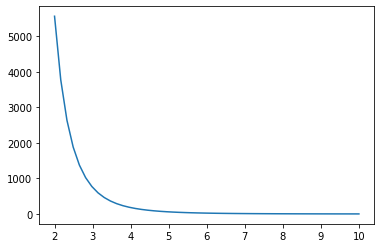

In [38]:
x = np.linspace(2,10)

plt.plot(x, p(x,A,alpha))